In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel(u'./temp/담당자별_판매량_통합.xlsx')

In [3]:
df

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,시계,A,가,198,123,120,137
1,구두,A,가,273,241,296,217
2,핸드백,A,가,385,316,355,331
3,시계,B,나,154,108,155,114
4,구두,B,나,200,223,213,202
5,핸드백,B,나,350,340,377,392
6,시계,C,다,168,102,149,174
7,구두,C,다,231,279,277,292
8,핸드백,C,다,365,383,308,323


In [4]:
df[df['3분기']>=250]

,제품명,담당자,지역,1분기,2분기,3분기,4분기
1,구두,A,가,273,241,296,217
2,핸드백,A,가,385,316,355,331
5,핸드백,B,나,350,340,377,392
7,구두,C,다,231,279,277,292
8,핸드백,C,다,365,383,308,323


In [5]:
df.iloc[:,[0,3,4,5,6]]

,제품명,1분기,2분기,3분기,4분기
0,시계,198,123,120,137
1,구두,273,241,296,217
2,핸드백,385,316,355,331
3,시계,154,108,155,114
4,구두,200,223,213,202
5,핸드백,350,340,377,392
6,시계,168,102,149,174
7,구두,231,279,277,292
8,핸드백,365,383,308,323


In [7]:
handbag = df[(df[u'제품명'] == u'핸드백')]
handbag

,제품명,담당자,지역,1분기,2분기,3분기,4분기
2,핸드백,A,가,385,316,355,331
5,핸드백,B,나,350,340,377,392
8,핸드백,C,다,365,383,308,323


In [8]:
handbag_sum = pd.DataFrame(handbag.sum(axis=1), columns=[u'연간판매량'])
handbag_sum

,연간판매량
2,1387
5,1459
8,1379


In [9]:
handbag_total = handbag.join(handbag_sum)
handbag_total

,제품명,담당자,지역,1분기,2분기,3분기,4분기,연간판매량
2,핸드백,A,가,385,316,355,331,1387
5,핸드백,B,나,350,340,377,392,1459
8,핸드백,C,다,365,383,308,323,1379


In [10]:
handbag_sum2 = pd.DataFrame(handbag_total.sum(), columns=[u'합계'])
handbag_sum2

,합계
제품명,핸드백핸드백핸드백
담당자,ABC
지역,가나다
1분기,1100
2분기,1039
3분기,1040
4분기,1046
연간판매량,4225


In [12]:
handbag_total2 = handbag_total.append(handbag_sum2.T)
handbag_total2

,제품명,담당자,지역,1분기,2분기,3분기,4분기,연간판매량
2,핸드백,A,가,385,316,355,331,1387
5,핸드백,B,나,350,340,377,392,1459
8,핸드백,C,다,365,383,308,323,1379
합계,핸드백핸드백핸드백,ABC,가나다,1100,1039,1040,1046,4225


In [13]:
handbag_total2.loc[u'합계',u'제품명'] = u'핸드백'
handbag_total2.loc[u'합계',u'담당자'] = u'전체'
handbag_total2.loc[u'합계',u'지역'] = u'전체'
handbag_total2

,제품명,담당자,지역,1분기,2분기,3분기,4분기,연간판매량
2,핸드백,A,가,385,316,355,331,1387
5,핸드백,B,나,350,340,377,392,1459
8,핸드백,C,다,365,383,308,323,1379
합계,핸드백,전체,전체,1100,1039,1040,1046,4225


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager
import matplotlib

In [18]:
font_location = '/Library/Fonts/Arial unicode.ttf'
font_name = font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rcParams['font.family'] = font_name
matplotlib.rcParams['axes.unicode_minus']=False

In [20]:
flights = sns.load_dataset('flights')

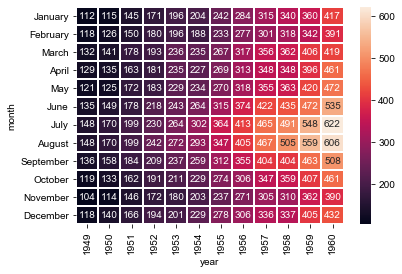

In [21]:
flights_passengers = flights.pivot("month", "year", "passengers")
sns.heatmap(flights_passengers, annot=True, fmt='d', linewidths=1)
plt.show()